In [1]:
import pandas as pd 
import numpy as np

In [18]:
df = pd.read_csv(r"C:\Users\ARYAN SHARMA\Desktop\titanic\train.csv",usecols=['Survived','Age','Fare'])

In [19]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [21]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [22]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [23]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [24]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)



In [27]:
accuracy_score(y_test,y_pred)

0.6703910614525139

In [28]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6588264669163546)

In [29]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [30]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')


In [31]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [32]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

C:\Users\ARYAN SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\ARYAN SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ARYAN SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version

In [39]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [40]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [38]:
clf = DecisionTreeClassifier()

clf.fit(X_train_trf,y_train)


y_pred = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.6312849162011173

In [41]:
output.sample(5)


,age,age_trf,fare,fare_trf,age_labels,fare_labels
437,24.000000,4.0,18.7500,8.0,"(23.0, 25.0]","(15.548, 21.045]"
547,29.699118,7.0,13.8625,7.0,"(28.0, 29.699]","(13.0, 15.548]"
792,29.699118,7.0,69.5500,13.0,"(28.0, 29.699]","(65.0, 90.0]"
498,25.000000,5.0,151.5500,14.0,"(23.0, 25.0]","(90.0, 512.329]"
506,33.000000,8.0,26.0000,10.0,"(31.0, 34.0]","(21.045, 26.0]"


In [42]:
import matplotlib.pyplot as plt


In [63]:
def function_binning(no_of_bins,transformer):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    print("Before")
    clf = DecisionTreeClassifier()

    
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    ans = accuracy_score(y_test,y_pred)
    print("Before",np.mean(cross_val_score(DecisionTreeClassifier(),X_train,y_train,cv=10,scoring="accuracy")))

    kbin_age = KBinsDiscretizer(n_bins=no_of_bins,encode='ordinal',strategy=transformer)
    kbin_fare = KBinsDiscretizer(n_bins=no_of_bins,encode='ordinal',strategy=transformer)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ],remainder='passthrough')

    X_train_trf = trf.fit_transform(X_train)
    X_test_trf = trf.transform(X_test)
    print("after")
    print("After CV:",np.mean(cross_val_score(DecisionTreeClassifier(),X_train_trf,y_train,cv=10,scoring='accuracy')))


    plt.figure(figsize=(14,4))
    plt.subplot(121)

    plt.hist(X_train['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_train_trf[:,0],color='red')

    plt.show()

    
    plt.figure(figsize=(14,4))
    plt.subplot(121)

    plt.hist(X_train['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_train_trf[:,1],color='red')
    plt.title("After")
    
    

    

Before
Before 0.6291862284820031
after
After CV: 0.6629303599374021


C:\Users\ARYAN SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\ARYAN SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\ARYAN SHARMA\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version

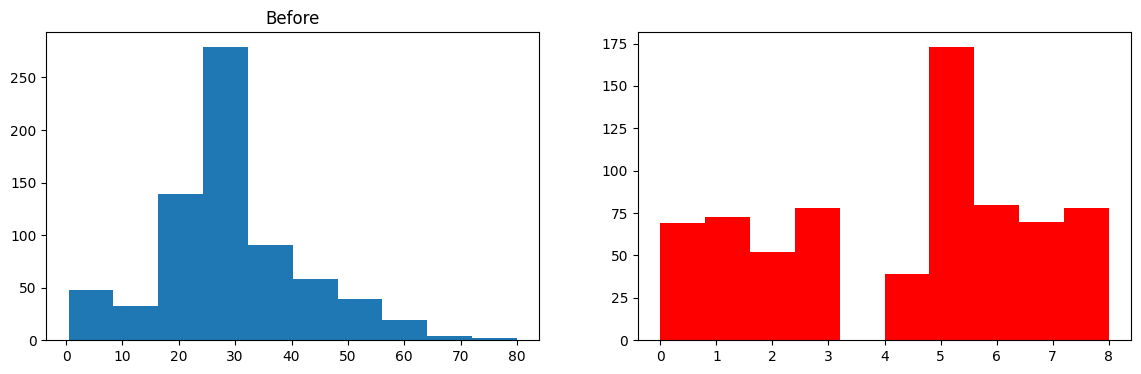

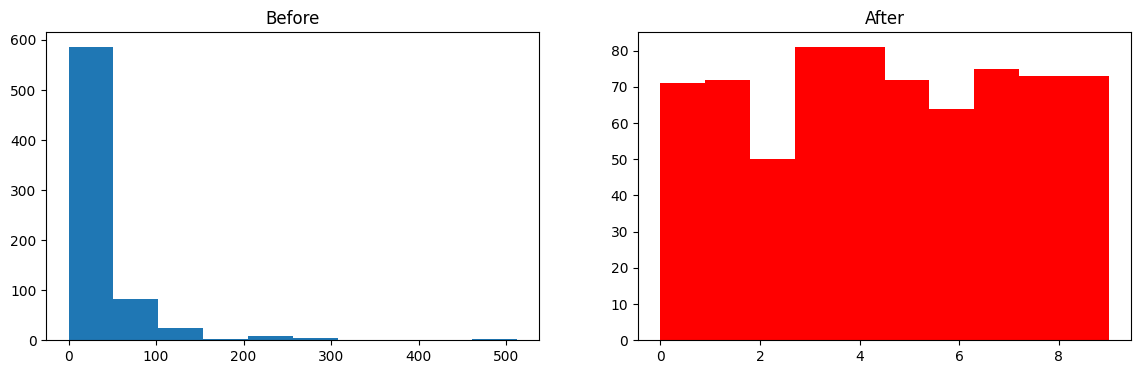

In [64]:
function_binning(10,'quantile')